In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:

T = 10000000
dt = 0.001
force = np.random.normal(0,1,T)
k = 10
x = 0.0       # Initial position
trajectory = []

for f in force:
    x += -x*k*dt + f*dt                # Update position
    trajectory.append(x)

powerspectrum = np.abs(np.fft.fft(trajectory)[:int(T//2)])**2/T
frequencies = np.fft.fftfreq(T, d=dt)[:int(T//2)]

def analytical_powerspectrum(frequencies, k):
    return 2/(k**2 + 4*np.pi**2*frequencies**2)
analytical_ps = analytical_powerspectrum(frequencies, k)

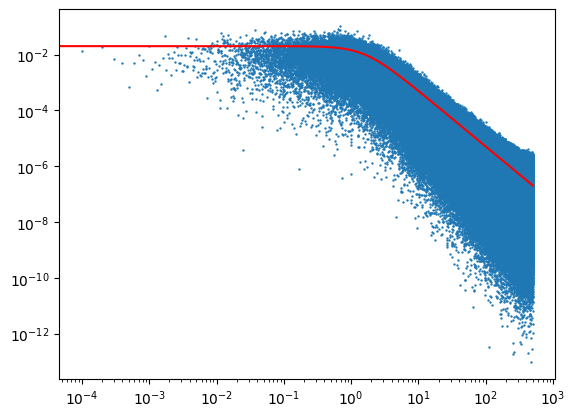

In [37]:
plt.scatter(frequencies, powerspectrum, s=0.5)
plt.plot(frequencies,analytical_ps, color='red')
plt.xscale('log')
plt.yscale('log')

In [38]:
coefficent = [[data/analytical] for data, analytical in zip(powerspectrum, analytical_ps)]
#compute histogram bars for the coefficent
hist, bin_edges = np.histogram(coefficent, bins=100)

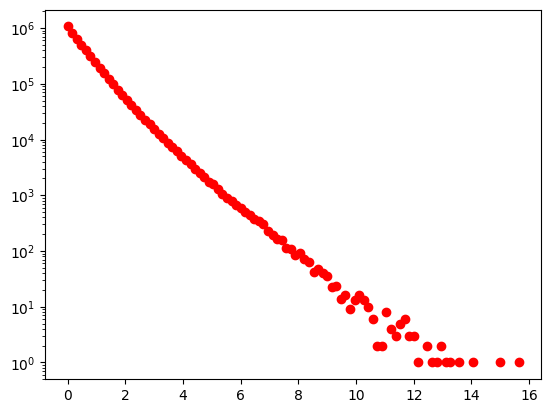

: 

In [39]:
plt.scatter(bin_edges[:-1], hist, color='red')
plt.yscale('log')
